## premise: study underlying model dynamics
challenge assumptions on sell-factor causality in prices

install critical libraries to the underlying operating systems

In [ ]:
#pip3 is a package installer for Python. It is used to install, upgrade, and remove Python packages
!pip3 install altair  #Altair is a declarative statistical visualization library for Python
!pip3 install altair-viewer        # allows you to view Altair visualizations in your web browser
!pip3 install -U altair_viewer #upgrades the altair_viewer package to the latest version
!pip3 install statsmodels
!pip3 install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 12.2 MB/s eta 0:00:00


Importing various Python libraries for data manipulation, visualization, machine learning, and statistical analysis

In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt #graphics --viz
from imblearn.over_sampling import ADASYN #synthetic minority oversampling
from sklearn.neighbors import KNeighborsClassifier #ML
from sklearn.preprocessing import StandardScaler #---
from statsmodels.tsa.api import VAR #granger causality
from statsmodels.tsa.vector_ar.var_model import VARResults, VARResultsWrapper
from sklearn.model_selection import train_test_split #TTS ,ML
from sklearn.metrics import accuracy_score #error analysis
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #displaying a confusion matrix.
from sklearn.metrics import classification_report
from scipy import stats # computing descriptive statistics, probability distributions, and statistical tests

retrieve the data...

grab data from github

In [ ]:
#load up binary binned pipeline
url_m = 'https://raw.githubusercontent.com/stefanbund/py3100/main/binary_binned_pipeline.csv'
mdf = pd.read_csv(url_m) #make a pandas dataframe
mdf  #matrix dataframe

,Unnamed: 0,group,time,s_MP,change,type,p_MP,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,...,length.1,sum_change.1,max_surge_mp.1,min_surge_mp.1,max_precursor_mp.1,min_precursor_mp.1,area.1,surge_area,surge_targets_met_pct.1,label
0,0,2,1.660222e+12,30.00,-5.333889e-04,precursor,29.99,-0.012510,0.000002,-0.004204,...,1,0.000838,29.83,29.83,29.84,29.84,0.000838,0.000838,0.033523,0
1,1,4,1.660222e+12,29.83,-6.637375e-05,precursor,29.88,0.002322,-0.000039,0.000775,...,2,0.002008,29.92,29.91,29.88,29.88,0.004017,0.004017,-0.133690,0
2,2,6,1.660222e+12,29.92,-6.345915e-04,precursor,29.91,0.005934,-0.000019,0.002165,...,2,0.002382,29.90,29.81,29.84,29.84,0.004765,0.004765,-0.200669,0
3,3,8,1.660222e+12,29.90,-5.020193e-04,precursor,29.91,-0.002813,-0.000010,-0.001013,...,2,0.002109,29.91,29.87,29.91,29.91,0.004218,0.004218,0.000000,0
4,4,10,1.660223e+12,29.91,-1.469841e-03,precursor,29.90,-0.000211,0.000061,0.001178,...,2,0.004807,29.67,29.60,29.49,29.49,0.009614,0.009614,-0.606673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,6411,12824,1.699042e+12,12.09,6.835784e-08,precursor,12.09,0.007670,-0.000135,0.001137,...,2,0.002900,12.10,12.06,12.07,12.07,0.005801,0.005801,-0.247934,0
6412,6412,12826,1.699043e+12,12.10,8.291806e-05,precursor,12.10,0.128049,0.000514,0.020292,...,2,0.001491,12.10,12.07,12.08,12.08,0.002982,0.002982,-0.165289,0
6413,6413,12828,1.699044e+12,12.10,4.140439e-04,precursor,12.10,-0.005610,-0.000328,-0.000815,...,2,0.005863,12.18,12.11,12.10,12.10,0.011726,0.011726,-0.656814,0
6414,6414,12830,1.699045e+12,12.18,-3.610930e-03,precursor,12.13,-0.003349,0.002099,-0.000474,...,1,0.001072,12.14,12.14,12.13,12.13,0.001072,0.001072,-0.082372,0


variables associated

In [ ]:
mdf.columns  #display and view the column names of the DataFrame "mdf".

Index(['Unnamed: 0', 'group', 'time', 's_MP', 'change', 'type', 'p_MP',
       'precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'length', 'sum_change', 'max_surge_mp', 'min_surge_mp',
       'max_precursor_mp', 'min_precursor_mp', 'area', 'surge_targets_met_pct',
       'group.1', 'time.1', 's_MP.1', 'change.1', 'type.1', 'p_MP.1',
       'precursor_buy_cap_pct_change.1', 'precursor_ask_cap_pct_change.1',
       'precursor_bid_vol_pct_change.1', 'precursor_ask_vol_pct_change.1',
       'length.1', 'sum_change.1', 'max_surge_mp.1', 'min_surge_mp.1',
       'max_precursor_mp.1', 'min_precursor_mp.1', 'area.1', 'surge_area',
       'surge_targets_met_pct.1', 'label'],
      dtype='object')

### reliability of label
correct classification

what is the average "1" trade's value? / calculates the mean value of 'surge_targets_met_pct' for rows where the 'label' is equal to 1 in the DataFrame mdf.

In [ ]:
mdf[mdf['label']==1]['surge_targets_met_pct'].mean() #.74 or above

1.1650823181204584

Creating two separate DataFrames, "ones" and "zeroes", by filtering the original DataFrame "mdf" based on the 'label' column

In [ ]:
ones = mdf[mdf['label']==1]  #good trades
zeroes = mdf[mdf['label']==0] #baddies

study the underlying dichotomies in your data

In [ ]:
ones.shape[0] # finger monkeys

119

retrieve the number of rows in the DataFrame "zeroes".

In [ ]:
zeroes.shape[0]  #evil monkeys

6297

dimensions = features in the data we wish to study, before we classify

In [ ]:
dimensions = ['precursor_ask_cap_pct_change','precursor_ask_vol_pct_change'] #created a list named dimensions containing two column names: 'precursor_ask_cap_pct_change' and 'precursor_ask_vol_pct_change'


creating a side-by-side histogram plot for two columns ('precursor_ask_cap_pct_change' and 'precursor_ask_vol_pct_change') within the DataFrame ones.

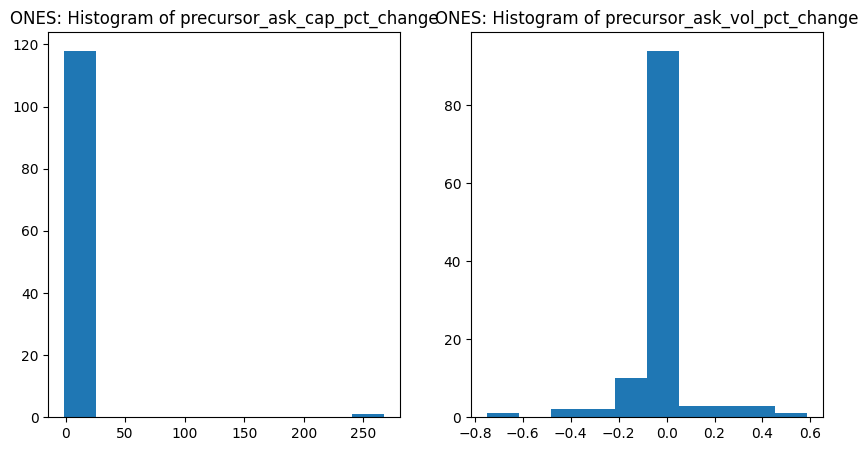

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(ones['precursor_ask_cap_pct_change'], bins=10)
axs[0].set_title('ONES: Histogram of precursor_ask_cap_pct_change')
axs[1].hist(ones['precursor_ask_vol_pct_change'], bins=10)
axs[1].set_title('ONES: Histogram of precursor_ask_vol_pct_change')
plt.show()

### cap vs vol probability density, ONES

plotting the kernel density estimate for the 'precursor_ask_cap_pct_change' column in the DataFrame ones.

<Axes: ylabel='Density'>

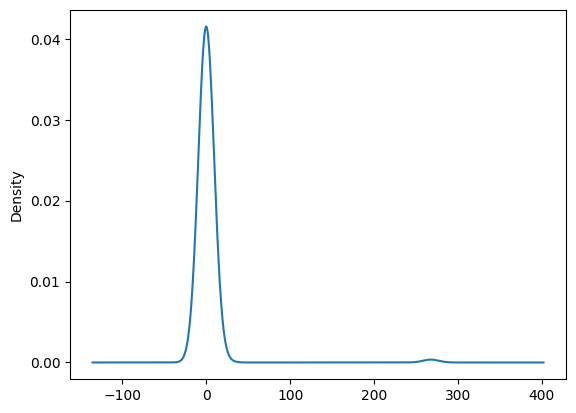

In [ ]:
ones['precursor_ask_cap_pct_change'].plot.density()  #precursor_ask_vol_pct_change


plotting the kernel density estimate for the 'precursor_ask_vol_pct_change' column in the DataFrame "ones"

<Axes: ylabel='Density'>

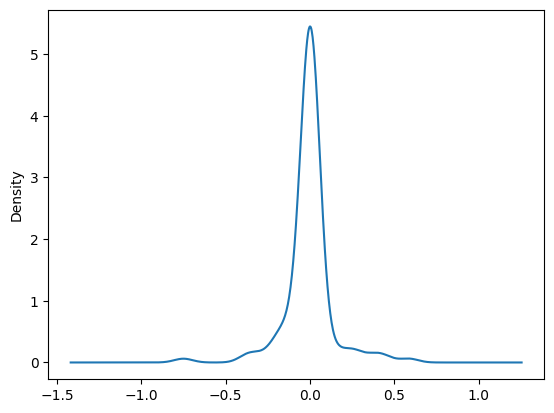

In [ ]:
ones['precursor_ask_vol_pct_change'].plot.density()  #precursor_ask_vol_pct_change

### cap vs vol probability density, ZEROES

provides a visual representation of the distribution of values in that specific column for the subset of data where the 'label' is 0.


<Axes: ylabel='Density'>

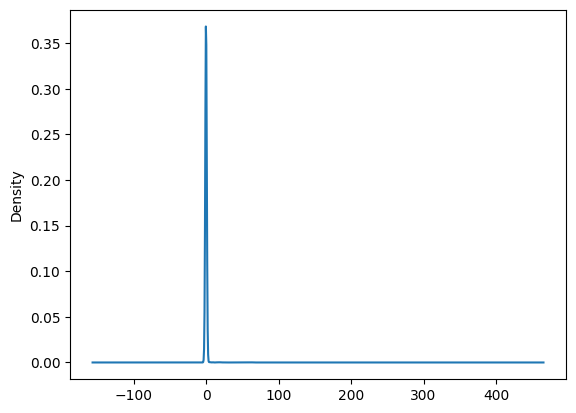

In [ ]:
zeroes['precursor_ask_cap_pct_change'].plot.density()  #precursor_ask_vol_pct_change


provides insights into the shape and spread of the data in that specific column for the subset where the 'label' is 0

<Axes: ylabel='Density'>

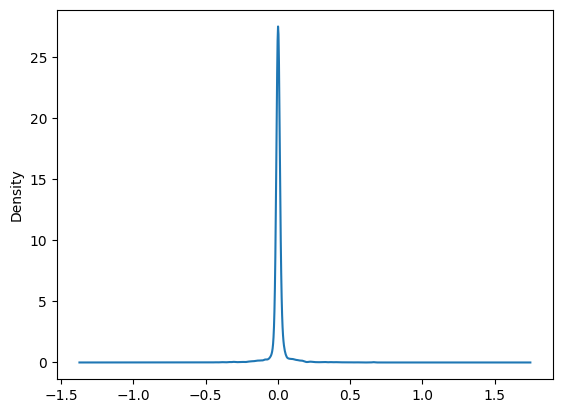

In [ ]:
zeroes['precursor_ask_vol_pct_change'].plot.density()  #precursor_ask_vol_pct_change


creating a side-by-side histogram plot for the 'precursor_ask_cap_pct_change' and 'precursor_ask_vol_pct_change' columns within the DataFrame "zeroes"

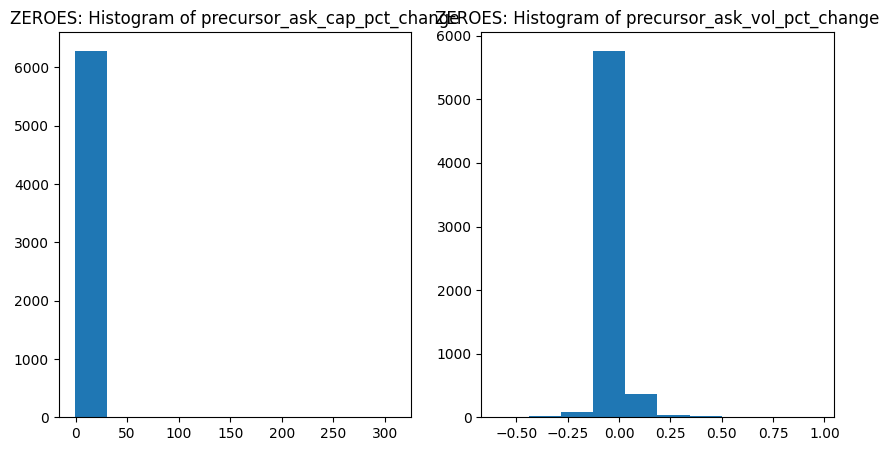

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(zeroes['precursor_ask_cap_pct_change'], bins=10)
axs[0].set_title('ZEROES: Histogram of precursor_ask_cap_pct_change')
axs[1].hist(zeroes['precursor_ask_vol_pct_change'], bins=10)
axs[1].set_title('ZEROES: Histogram of precursor_ask_vol_pct_change')
plt.show()

## Modeling and Prediction Using KNeighbors

preparing a machine learning pipeline using the ADASYN oversampling technique and a k-nearest neighbors (KNN) classifier

In [ ]:
m2_pipeline = mdf #pd.read_csv("0 Data Processing/binary_binned_pipeline.csv")  #use mdf instead

corr_list = [
'precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change','length', 'sum_change', 'surge_targets_met_pct','time', 'label']

m2_pipeline = m2_pipeline[corr_list]
keepable = ['precursor_buy_cap_pct_change',
        'precursor_ask_cap_pct_change',
        'precursor_bid_vol_pct_change',
        'precursor_ask_vol_pct_change',
        'sum_change','length','time']

y = m2_pipeline['label'].values   # y is always a vector, a list of labels
X = m2_pipeline[keepable].values  #x matrix is a list of values/dimensions

X_resampled, y_resampled = ADASYN(random_state=42 ).fit_resample(X, y) #create synthetic classes

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()  #standardize all numerics
X_train_scaled = scaler.fit_transform(X_resampled)

X_test_scaled = scaler.fit_transform(X_test)

knn = KNeighborsClassifier(algorithm='auto', n_jobs=1, n_neighbors=3)
knn.fit(X_train_scaled, y_resampled)



KNeighborsClassifier(n_jobs=1, n_neighbors=3)

created a correlation matrix for the selected columns in the DataFrame "m2_pipeline" based on the corr_list

In [ ]:
#define the list of collums to calculate the correlation
corr_list = [
'precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change','length', 'sum_change', 'surge_targets_met_pct','time', 'label']

m2_pipeline = m2_pipeline[corr_list] #Selects only the columns specified in corr_list.
m2_pipeline.corr()

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,length,sum_change,surge_targets_met_pct,time,label
precursor_buy_cap_pct_change,1.000000,0.195900,0.547428,0.177817,-0.074944,0.136782,-0.001754,-0.068998,-0.025531
precursor_ask_cap_pct_change,0.195900,1.000000,0.190969,0.217833,0.055215,-0.131603,0.067987,-0.044788,0.041780
precursor_bid_vol_pct_change,0.547428,0.190969,1.000000,0.058289,0.041534,-0.151138,-0.007312,0.028991,-0.006628
precursor_ask_vol_pct_change,0.177817,0.217833,0.058289,1.000000,0.006376,0.041253,-0.008205,-0.006647,-0.017352
length,-0.074944,0.055215,0.041534,0.006376,1.000000,-0.254271,0.073598,0.037215,-0.008279
sum_change,0.136782,-0.131603,-0.151138,0.041253,-0.254271,1.000000,-0.036988,0.021903,-0.137136
surge_targets_met_pct,-0.001754,0.067987,-0.007312,-0.008205,0.073598,-0.036988,1.000000,-0.018359,0.462379
time,-0.068998,-0.044788,0.028991,-0.006647,0.037215,0.021903,-0.018359,1.000000,-0.030431
label,-0.025531,0.041780,-0.006628,-0.017352,-0.008279,-0.137136,0.462379,-0.030431,1.000000


using Matplotlib to create a heatmap visualization of the correlation matrix for the DataFrame "m2_pipeline".

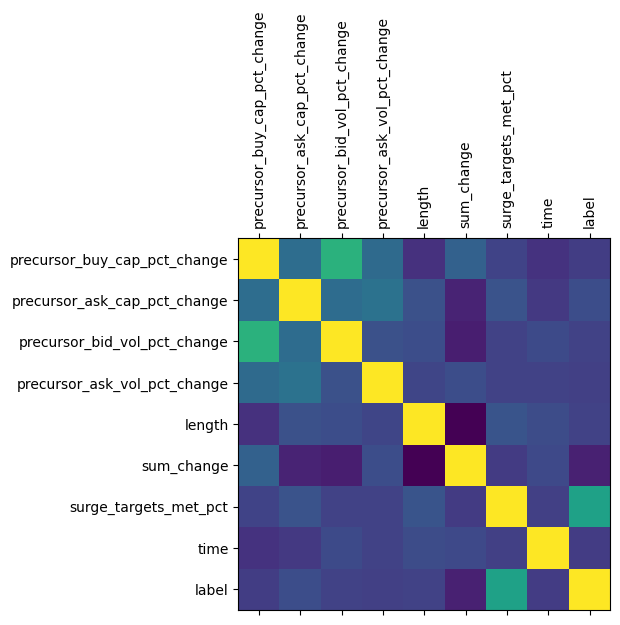

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
df = m2_pipeline

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the correlation matrix
plt.matshow(corr_matrix) #display a heatmap of the correlation matrix.
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.show()


the trained K-nearest neighbors (KNN) classifier (knn) to make predictions on the test set (X_test_scaled)

In [ ]:
#predict
y_pred_knn = knn.predict(X_test_scaled)


#plot decision boundary
# Assuming your KNN model is stored in the variable 'knn'
# plot_decision_boundary(knn, X_test_scaled, y_test)
# plt.show()


In [ ]:
# Compute the k-neighborhood graph for your data
graph = knn.kneighbors_graph(X)
graph
#represents the adjacency matrix of the k-neighbors graph

<6416x12589 sparse matrix of type '<class 'numpy.float64'>'
	with 19248 stored elements in Compressed Sparse Row format>

0.971405877680699
[0 1]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1267
           1       0.95      0.99      0.97      1251

    accuracy                           0.97      2518
   macro avg       0.97      0.97      0.97      2518
weighted avg       0.97      0.97      0.97      2518



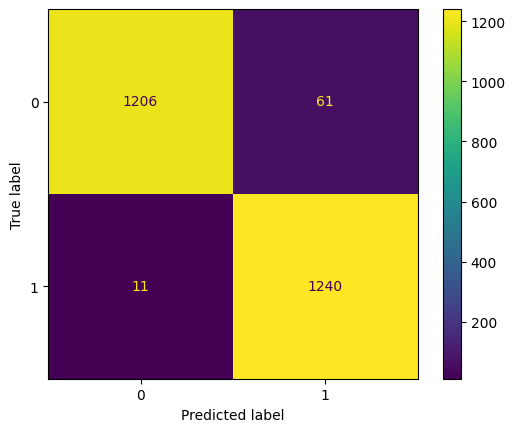

In [ ]:
#display confusion matrix
# Predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
# Accuracy calculation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)
# Unique labels in the 'label' column
labels_ = m2_pipeline['label'].unique()
print(labels_)
# Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, labels=labels_)

# Classification Report
print(classification_report(y_test, y_pred_knn ,zero_division=1))

### Causality Studies


creating a subset of your DataFrame "mdf" containing rows where the 'label' column is equal to 1, and selecting specific columns defined by the keepable list

In [ ]:
ones_r = mdf[mdf['label']==1][keepable]  #good trades
ones_r #DataFrame containing rows where the label is 1 and including only the columns specified in keepable

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,sum_change,length,time
47,0.008169,-0.000036,0.003968,-0.002134,-0.006827,3,1.660438e+12
108,-0.002202,-0.000064,-0.003449,-0.011060,-0.227402,1,1.660756e+12
144,-0.204558,0.000178,-0.088451,0.029849,-0.215072,1,1.660915e+12
159,0.006487,-0.000134,0.003800,-0.023368,-0.003434,2,1.660964e+12
189,0.001016,-0.000022,0.002570,-0.002694,-0.373548,2,1.661184e+12
...,...,...,...,...,...,...,...
6283,-0.012920,-0.003338,-0.002208,-0.027292,-0.005985,2,1.698152e+12
6292,-0.008260,0.011126,-0.000741,0.012573,-0.013003,2,1.698251e+12
6312,0.215995,0.003481,0.027989,0.034112,-0.057227,6,1.698326e+12
6315,0.059232,0.009487,0.009968,0.036562,-0.030545,4,1.698364e+12


defined a function called test_granger that fits a VAR(p) model on the input DataFrame and performs pairwise Granger Causality tests. Then, applying this function to a subset of the data where the 'label' is equal to 1 (ones_r). Finally, creating a causality matrix and filtering it based on a significance level (0.01).

In [ ]:

def test_granger(df, p):
    """
    Fits a VAR(p) model on the input df and performs pairwise Granger Causality tests
    """
     # Fit VAR model on first-order differences
    model = VAR(df.diff().dropna())
    results = model.fit(p)
    # Initialize p-value matrix
    p_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    # Perform pairwise Granger Causality tests
    for caused in df.columns:
        for causing in df.columns:
            if caused != causing:
                test_result = results.test_causality(caused, causing)
                p_value = test_result.pvalue
                p_matrix.loc[caused, causing] = p_value
    # Ensure all columns have float dtypetest_granger
    p_matrix = p_matrix.astype(float)
    return p_matrix
# Set the lag order for VAR(p)
p=7
ones = mdf[mdf['label']==1]  #good trades # Subset of data where the 'label' is equal to 1
p_matrix0 = test_granger(ones_r, p) # Apply the test_granger function
caul_mtrx = p_matrix0.rename(index={item: f"{item} caused by" for item in p_matrix0.index}) # Rename the columns for better interpretation
caul_mtrx.where(caul_mtrx.isna(), caul_mtrx <= 0.01) # Filter the causality matrix based on a significance level (0.01)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,sum_change,length,time
precursor_buy_cap_pct_change caused by,NaN,False,False,False,False,False,False
precursor_ask_cap_pct_change caused by,False,NaN,False,False,False,False,False
precursor_bid_vol_pct_change caused by,False,False,NaN,False,False,False,False
precursor_ask_vol_pct_change caused by,False,False,False,NaN,False,False,False
sum_change caused by,False,False,False,False,NaN,False,False
length caused by,False,False,False,False,False,NaN,False
time caused by,False,False,False,False,False,False,NaN


applying the test_granger function to a subset of your data where the 'label' is equal to 0 (zeroes_r). Then, creating a causality matrix and filtering it based on a significance level of 0.01.

In [ ]:
# Subset of data where the 'label' is equal to 0
zeroes_r = mdf[mdf['label']==0][keepable]  #bad trades
p_matrix1 = test_granger(zeroes_r, p) # Apply the test_granger function to the subset
# Rename the columns for better interpretation
caul_mtrx = p_matrix1.rename(index={item: f"{item} caused by" for item in p_matrix1.index})
# Filter the causality matrix based on a significance level (0.01)
caul_mtrx.where(caul_mtrx.isna(), caul_mtrx <= 0.01)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,sum_change,length,time
precursor_buy_cap_pct_change caused by,NaN,False,False,False,False,False,False
precursor_ask_cap_pct_change caused by,False,NaN,True,False,False,False,False
precursor_bid_vol_pct_change caused by,False,False,NaN,False,False,False,True
precursor_ask_vol_pct_change caused by,False,False,False,NaN,False,False,False
sum_change caused by,False,False,False,False,NaN,True,True
length caused by,False,False,False,False,True,NaN,True
time caused by,True,False,True,False,True,True,NaN
